<a href="https://colab.research.google.com/github/ghoshmithun/Sem3_DL_Assignment2020/blob/main/Movie_Sentiment_Classification_Transfer_learning_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-10-19 15:46:44--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  21.7MB/s    in 5.3s    

2020-10-19 15:46:49 (15.1 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
!tar -xzf aclImdb_v1.tar.gz 

In [ ]:
ls -a

./  ../  aclImdb/  aclImdb_v1.tar.gz  .config/  sample_data/


We have the data downloaded in the aclImdb folder. Lets explore the data

We are printing the readme which has the description fo the **data**

In [ ]:
!ls -a aclImdb/

.  ..  imdbEr.txt  imdb.vocab  README  test  train


In [ ]:
!cat aclImdb/README

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

In [ ]:
!head -10 aclImdb/train/pos/4298_10.txt

This movie awed me so much that I watch it at least once a year. At times I find it uncomfortable. At times I find it empowering. And I always find the characters human and real. It is a movie that shows you the gritty reality of life in LA, starting with the recurring helicopter search lights scanning for the dangers lurking so close to the ordinary lives being carried on by the characters. It is also a movie that shows you how the kindness of a stranger can change your life and empower you to make a difference. Grand Canyon reminds you that every action you take, whether intended or not, has powerful repercussions. I found this movie to be similar in many ways to Robert Altman's film Short Cuts. Both had a star-studded roster of perfectly cast actors & actresses and both movies allowed you to gradually see how the the characters interrelated with one another and affected each other, for better or worse. Grand Canyon did a better job of providing a cohesive message, (hope in the face 

Each of the reviews are kept as a file , so we have to merge them

In [ ]:
import glob
import os
def create_file(file_dir,final_file_name,label):
  os.chdir(file_dir)
  read_files = glob.glob("*.txt")
  with open(final_file_name, "w") as outfile:
      for f in read_files:
          with open(f, "r") as infile:
              outfile.write(str(infile.read()) + '||' + label + '\n')

In [ ]:
os.getcwd()

'/content'

In [ ]:
create_file('/content/aclImdb/train/pos','all_pos_comments.txt','1')

In [ ]:
create_file('/content/aclImdb/train/neg','all_neg_comments.txt','0')

Finally we have processed the data and uploaded here in csv format for easy experimentation. 

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
ls -al gdrive/

total 16
dr-x------  2 root root 4096 Dec  1 18:02 .file-revisions-by-id/
drwx------ 12 root root 4096 Dec  1 18:02 MyDrive/
dr-x------  2 root root 4096 Dec  1 18:02 .shortcut-targets-by-id/
drwx------  2 root root 4096 Dec  1 18:02 .Trash/


In [ ]:
ls -al /content/gdrive/MyDrive/Sem3/DL/project1/

total 65040
-rw------- 1 root root 66212309 Oct 19  2019 'IMDB Dataset.csv'
drwx------ 2 root root     4096 Oct 19 14:53  model_artifacts/
-rw------- 1 root root   120560 Oct 31 15:52  Movie_Sentiment_Classification1.ipynb
-rw------- 1 root root     8147 Oct 31 15:44  movie_sentiment_classification1.py
-rw------- 1 root root   114624 Oct 31 15:52 'Movie Sentiment Classification2.ipynb'
-rw------- 1 root root     8436 Oct 31 15:27  movie_sentiment_classification2.py
-rw------- 1 root root   123887 Oct 31 14:40  Movie_Sentiment_Classification.ipynb
-rw------- 1 root root     8104 Oct 31 14:40  movie_sentiment_classification.py


In [11]:
import pandas as pd

imdb_data = pd.read_csv('/content/gdrive/MyDrive/Sem3/DL/project1/IMDB Dataset.csv')
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Higher version of transformer might give error

!pip install transformers==3

     |████████████████████████████████| 757kB 9.0MB/s 
     |████████████████████████████████| 890kB 16.5MB/s 
     |████████████████████████████████| 1.1MB 29.2MB/s 
     |████████████████████████████████| 3.0MB 43.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=d320b5c6ec396b0e6d5b55f00935c3c5699dd8278c41725771ef58e605f042a9
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [5]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import transformers

# specify GPU
device = torch.device("cuda")



from transformers import AutoModel, BertTokenizerFast
from matplotlib import pyplot as plt
# optimizer from hugging face transformers
from transformers import AdamW
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
EPOCHS=10
BERT_MODEL_SAVE = '/content/gdrive/MyDrive/Sem3/DL/project1//model_artifacts/bert_weights.pt'

Review column has html tags . We have to get rid of those



In [9]:
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [12]:
imdb_data['clean_review'] = imdb_data['review'].apply(cleanhtml)
imdb_data['label'] = imdb_data['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

imdb_data.head()

,review,sentiment,clean_review,label
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [20]:
def create_token(sent_list):
    if type(sent_list) != list:
        sent_list = [sent_list]
    tokens = tokenizer.batch_encode_plus(
        sent_list,
        max_length=25,
        pad_to_max_length=True,
        truncation=True
    )
    return tokens


def get_seq_mask(tokens):
    seq = torch.tensor(tokens['input_ids'])
    mask = torch.tensor(tokens['attention_mask'])
    return seq , mask

def create_dataloader(tokens,y,train=True):
    batch_size = 32
    ## convert lists to tensors
    seq, mask = get_seq_mask(tokens)
    y_tensor = torch.tensor(y)
    # wrap tensors
    tensor_wrap_x_y = TensorDataset(seq, mask, y_tensor)
    if train:
        # sampler for sampling the data during training
        sampler = RandomSampler(tensor_wrap_x_y)
    else:
        sampler = SequentialSampler(tensor_wrap_x_y)
    # dataLoader for training and validation
    dataloader = DataLoader(tensor_wrap_x_y, sampler=sampler, batch_size=batch_size)
    return dataloader



class BERT_Arch(nn.Module):
    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu = nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768, 512)
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)
        # softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # define the forward pass
    def forward(self, sent_id, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)
        return x


## Fine tune BERT

# function to train the model
def train(train_dataloader):
    model.train()
    total_loss, total_accuracy = 0, 0
    # empty list to save model predictions
    total_preds = []
    # iterate over batches
    for step, batch in enumerate(train_dataloader):
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
        
        # push the batch to gpu
        batch = [r.to(device) for r in batch]

        sent_id, mask, labels = batch
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch
        preds = model(sent_id, mask)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # add on to the total loss
        total_loss = total_loss + loss.item()
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        preds = preds.detach().cpu().numpy()
        # append the model predictions
        total_preds.append(preds)
    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    # returns the loss and predictions
    return avg_loss, total_preds


# function for evaluating the model
def evaluate(val_dataloader):
    print("\nEvaluating...")
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
    # empty list to save the model predictions
    total_preds = []
    # iterate over batches
    for step, batch in enumerate(val_dataloader):
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
    # deactivate autograd
    with torch.no_grad():
        # model predictions
        preds = model(sent_id, mask)
        # compute the validation loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        total_loss = total_loss + loss.item()
        preds = preds.detach().cpu().numpy()
        total_preds.append(preds)
    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds


def model_train_validation(train_dataloader,val_dataloader):
    # set initial loss to infinite
    best_valid_loss = float('inf')
    # empty lists to store training and validation loss of each epoch
    train_losses = []
    valid_losses = []
    # for each epoch
    for epoch in range(EPOCHS):
        print('\n Epoch {:} / {:}'.format(epoch + 1, EPOCHS))
        # train model
        train_loss, _ = train(train_dataloader)
        # evaluate model
        valid_loss, _ = evaluate(val_dataloader)
        # save the best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), BERT_MODEL_SAVE)
        # append training and validation loss
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        print(f'\nTraining Loss: {train_loss:.3f}')
        print(f'Validation Loss: {valid_loss:.3f}')

def score_model_new_data(list_sentences):
    # load weights of best model
    path = BERT_MODEL_SAVE
    model = BERT_Arch(bert)
    model.load_state_dict(torch.load(path))
    model = model.to(device)
    text_sent , text_sent_mask = get_seq_mask(create_token(list_sentences))
    # get predictions for test data
    with torch.no_grad():
      sent_predict = model(text_sent.to(device), text_sent_mask.to(device))
      sent_predict = sent_predict.detach().cpu().numpy()
    prediction = np.argmax(sent_predict, axis = 1)
    return prediction

def score_model_new_data_probability(list_sentences):
    # load weights of best model
    path = BERT_MODEL_SAVE
    model = BERT_Arch(bert)
    model.load_state_dict(torch.load(path))
    model = model.to(device)
    text_sent , text_sent_mask = get_seq_mask(create_token(list_sentences))
    # get predictions for test data
    with torch.no_grad():
      sent_predict = model(text_sent.to(device), text_sent_mask.to(device))
      sent_predict = sent_predict.detach().cpu().numpy()
    prediction = np.max(sent_predict, axis = 1)
    return prediction


In [ ]:
model

BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imdb_data['clean_review'].values, imdb_data['label'].values, test_size=0.2)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.4)

print("Shape of train data:", len(X_train))
print("Shape of CV data:", len(X_cv))
print("Shape of test data:", len(X_test))

Shape of train data: 24000
Shape of CV data: 16000
Shape of test data: 10000


In [ ]:
tokens_train = create_token(X_train)
tokens_val = create_token(X_cv)

In [ ]:
train_dataloader = create_dataloader(tokens_train,y_train)
val_dataloader = create_dataloader(tokens_val,y_cv,train=False)

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)


# push the model to GPU
model = model.to(device)


optimizer = AdamW(model.parameters(), lr=1e-5)
# compute the class weights
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)

# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# converting list of class weights to a tensor
weights = torch.tensor(weights, dtype=torch.float)
# define the loss function
cross_entropy = nn.NLLLoss(weight=weights)
model_train_validation(train_dataloader, val_dataloader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



 Epoch 1 / 10
  Batch    50  of    750.
  Batch   100  of    750.
  Batch   150  of    750.
  Batch   200  of    750.
  Batch   250  of    750.
  Batch   300  of    750.
  Batch   350  of    750.
  Batch   400  of    750.
  Batch   450  of    750.
  Batch   500  of    750.
  Batch   550  of    750.
  Batch   600  of    750.
  Batch   650  of    750.
  Batch   700  of    750.

Evaluating...
  Batch    50  of    500.
  Batch   100  of    500.
  Batch   150  of    500.
  Batch   200  of    500.
  Batch   250  of    500.
  Batch   300  of    500.
  Batch   350  of    500.
  Batch   400  of    500.
  Batch   450  of    500.

Training Loss: 0.686
Validation Loss: 0.001

 Epoch 2 / 10
  Batch    50  of    750.
  Batch   100  of    750.
  Batch   150  of    750.
  Batch   200  of    750.
  Batch   250  of    750.
  Batch   300  of    750.
  Batch   350  of    750.
  Batch   400  of    750.
  Batch   450  of    750.
  Batch   500  of    750.
  Batch   550  of    750.
  Batch   600  of    750.


In [15]:
# sample data
text = [ "I would have felt wonderful by doing anything else but not watching movie", "This movie was not good"]
print(*zip(text,score_model_new_data(text)))
y_test_pred = score_model_new_data(X_test.tolist())
print(classification_report(y_pred=y_test_pred, y_true=y_test))

('I would have felt wonderful by doing anything else but not watching movie', 0) ('This movie was not good', 0)
              precision    recall  f1-score   support

           0       0.67      0.44      0.53      4943
           1       0.59      0.79      0.68      5057

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.61     10000
weighted avg       0.63      0.62      0.61     10000



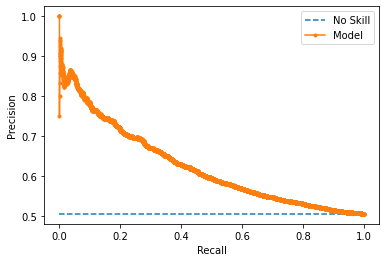

In [21]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
y_test_pred = score_model_new_data_probability(X_test.tolist())
def plot_pr_curve(test_y, model_probs):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # plot the no skill precision-recall curve
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(test_y, model_probs)
    pyplot.plot(recall, precision, marker='.', label='Model')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()


plot_pr_curve(y_test,y_test_pred)

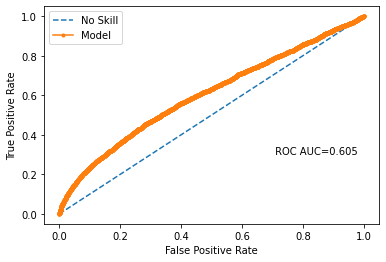

In [22]:
# plot no skill and model roc curves
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
y_test_pred = score_model_new_data_probability(X_test.tolist())
def plot_roc_curve(test_y, model_probs,save=False):
    pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    # plot model roc curve
    fpr, tpr, _ = roc_curve(test_y, model_probs)
    pyplot.plot(fpr, tpr, marker='.', label='Model')
    auc = roc_auc_score(test_y, model_probs)
    pyplot.text(0.7,0.3,' ROC AUC=%.3f' % (auc))
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    if save:
        return pyplot
    # show the plot
    pyplot.show()

plot_roc_curve(y_test,y_test_pred)